In [17]:
import pandas as pd

In [25]:
df = pd.read_csv('/content/glassdoor_jobs.csv')

In [ ]:
df

In [26]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

In [27]:
df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
minus_hr = minus_kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [28]:
df['min_salary'] = minus_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = minus_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [ ]:
df['company_txt'] = df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3],axis = 1)
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df['job_state'].value_counts()

In [36]:
df['same_state'] = df.apply(lambda x : 1 if x.Location == x.Headquarters else 0,axis = 1)

0      0
1      0
2      1
3      1
4      1
      ..
950    0
951    0
952    1
953    0
955    0
Name: same_state, Length: 742, dtype: int64

In [37]:
df['age'] = df.Founded.apply(lambda x : x if x<1 else 2021 - x)

In [46]:
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df['spark_yn'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['aws_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [ ]:
df.R_yn.value_counts()

In [ ]:
df.python_yn.value_counts()

In [ ]:
df.spark_yn.value_counts()

In [ ]:
df.aws_yn.value_counts()

In [ ]:
df.excel_yn.value_counts()

In [51]:
df_out = df.drop(['Unnamed: 0'],axis=1)
df_out.to_csv('salary_data_cleaned.csv',index= False)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('/content/salary_data_cleaned.csv')

In [89]:
df.head()
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [71]:
def title_simplifier(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'machine learning' in title.lower():
    return 'mle'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'na'

def seniority(title):
  if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower() :
    return 'senior'
  elif 'jr' in title.lower() or 'jr.' in title.lower():
    return 'jr'
  else :
    return 'na'

In [72]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [73]:
df['job_state'] = df.job_state.apply(lambda x :x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [74]:
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [75]:
df['num_comp']= df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [76]:
df['min_salary'] = df.apply(lambda x : x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)

In [77]:
df['max_salary'] = df.apply(lambda x : x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [79]:
df['company_txt'] = df.company_txt.apply(lambda x : x.replace('\n',''))

In [80]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


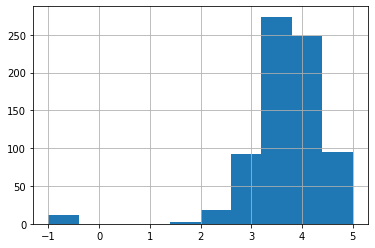

In [83]:
df.Rating.hist()

df.age.hist()

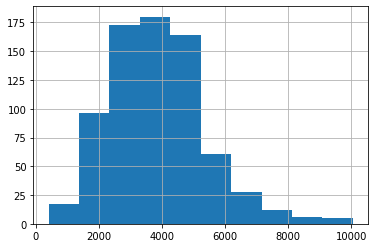

In [85]:
df.desc_length.hist()

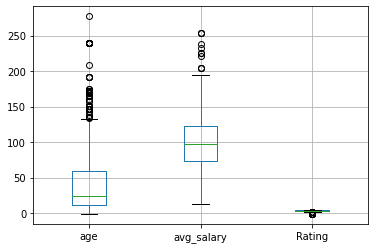

In [86]:
df.boxplot(column=['age','avg_salary','Rating'])

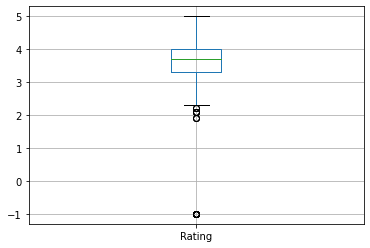

In [87]:
df.boxplot(column= 'Rating')

In [90]:
df[['age','avg_salary','Rating','desc_length']].corr()

,age,avg_salary,Rating,desc_length
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_length,0.164188,0.078808,-0.012281,1.000000


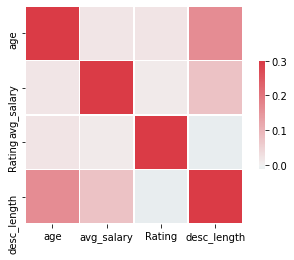

In [95]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_length']].corr(),vmax = .3, center=0,cmap=cmap, square=True, linewidths= .5, cbar_kws = {"shrink": .5})

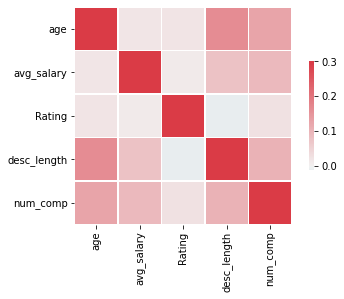

In [96]:
sns.heatmap(df[['age','avg_salary','Rating','desc_length','num_comp']].corr(),vmax = .3, center=0,cmap=cmap, square=True, linewidths= .5, cbar_kws = {"shrink": .5})

In [100]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [101]:
df_cat = df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state','spark_yn','aws_yn','excel_yn','job_simp','seniority']]

graph for Location: total = 200


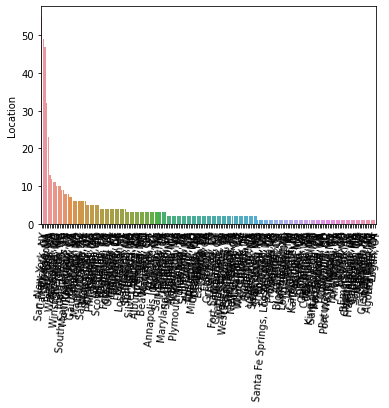

graph for Headquarters: total = 198


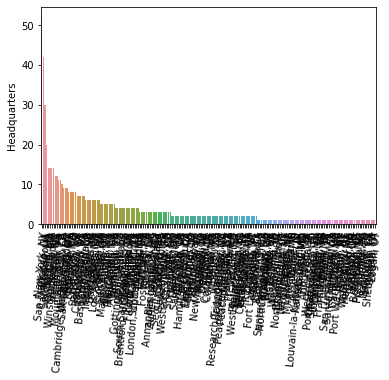

graph for Size: total = 9


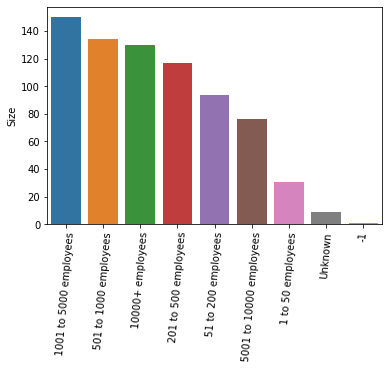

graph for Type of ownership: total = 11


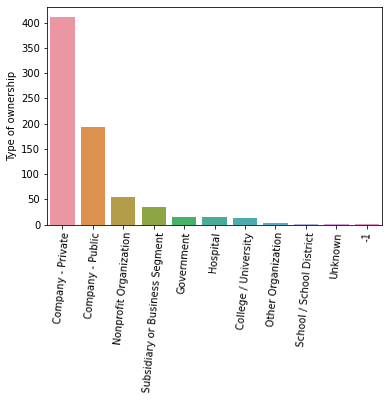

graph for Industry: total = 60


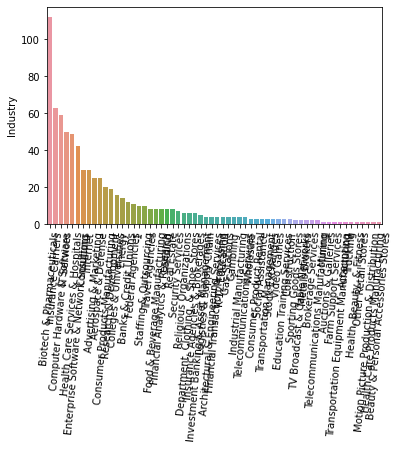

graph for Sector: total = 25


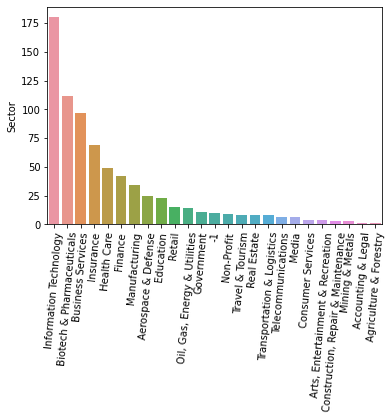

graph for Revenue: total = 14


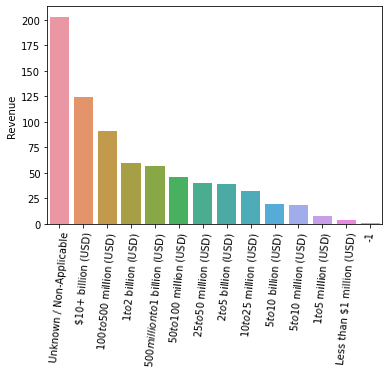

graph for company_txt: total = 343


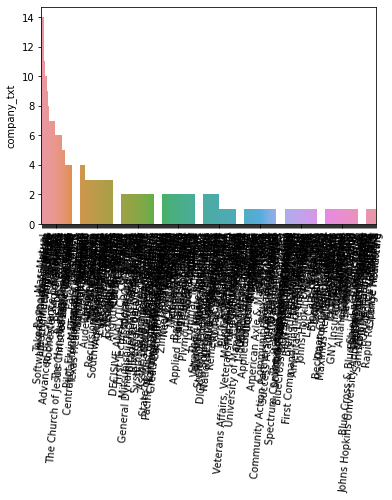

graph for job_state: total = 37


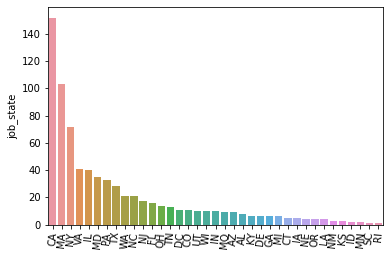

graph for same_state: total = 2


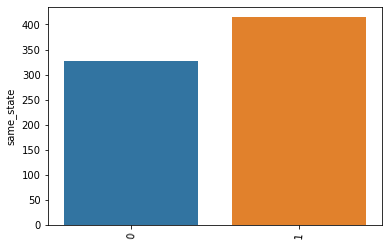

graph for spark_yn: total = 2


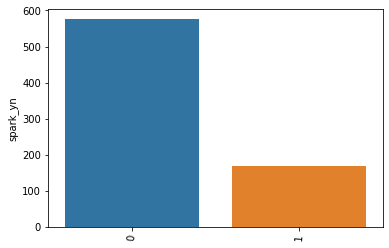

graph for aws_yn: total = 2


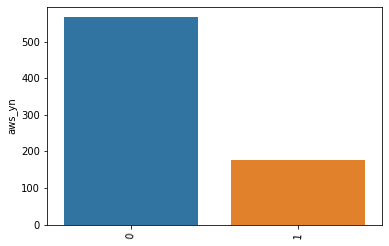

graph for excel_yn: total = 2


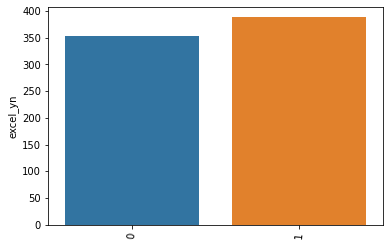

graph for job_simp: total = 7


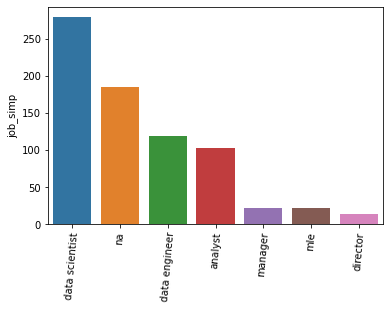

graph for seniority: total = 3


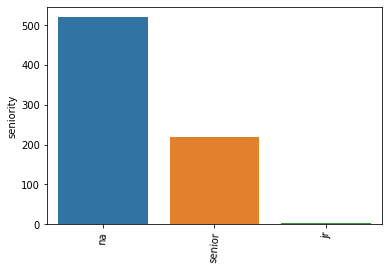

In [106]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d"%(i,len(cat_num)))
  chart = sns.barplot(x=cat_num.index,y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(),rotation= 85)
  plt.show()

In [107]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [108]:
pd.pivot_table(df,index= 'job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [109]:
pd.pivot_table(df,index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [111]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [112]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: ignored

In [113]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [120]:

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [127]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

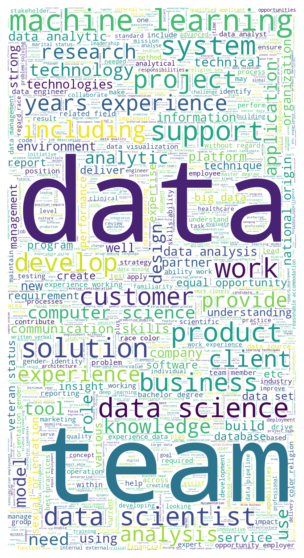

In [128]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()